<a href="https://colab.research.google.com/github/JeFFich/Math_Programming/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Фиксация ряда опций по умолчанию
pd.set_option('display.max_columns', 30)
sns.set(style='darkgrid', palette='deep')
plt.rcParams['figure.figsize'] = 15, 8
plt.rcParams['savefig.format'] = 'pdf'

In [ ]:
df = pd.read_csv('/content/BankChurners.csv')

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Быстрая проверка на уникальность всех клиентов

In [ ]:
assert df.CLIENTNUM.nunique() == df.shape[0]

Удаление ненужных колонок

In [ ]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                  inplace=True)

Просмотр информации о типе оставшихся колонок и наличие в них пропусков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Формирование отчета

In [ ]:
pdf = PdfPages("EDA_Отчет.pdf", )

**1. Проверка распределений классов**

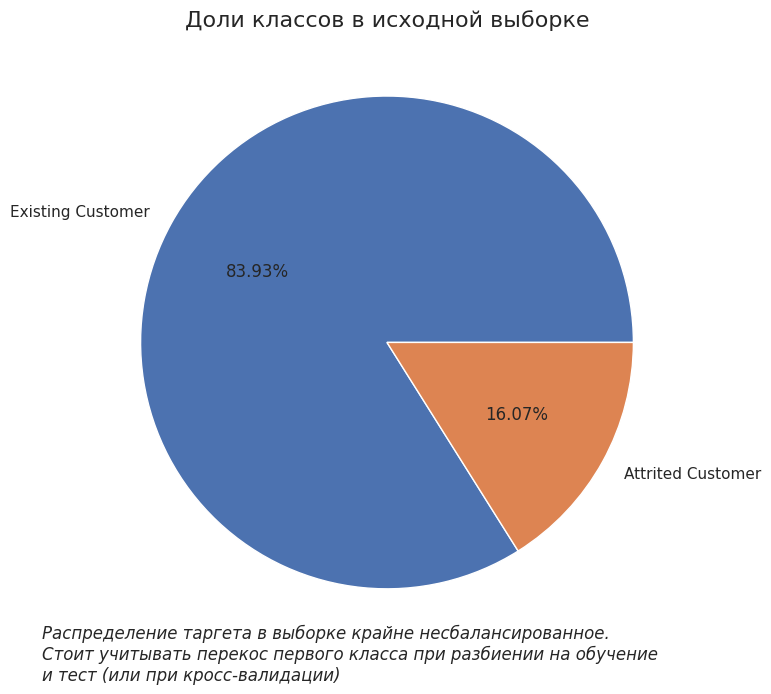

In [ ]:
plt.title("Доли классов в исходной выборке", fontsize=16)
plt.pie(df.Attrition_Flag.value_counts(), labels=['Existing Customer', 'Attrited Customer'],autopct="%0.2f%%")
pie_text = """Распределение таргета в выборке крайне несбалансированное.
Стоит учитывать перекос первого класса при разбиении на обучение
и тест (или при кросс-валидации)"""

plt.text(-1.4, -1.37, pie_text, fontstyle='italic')

pdf.savefig(bbox_inches='tight')

**2. Проверка информативности одного из признаков**

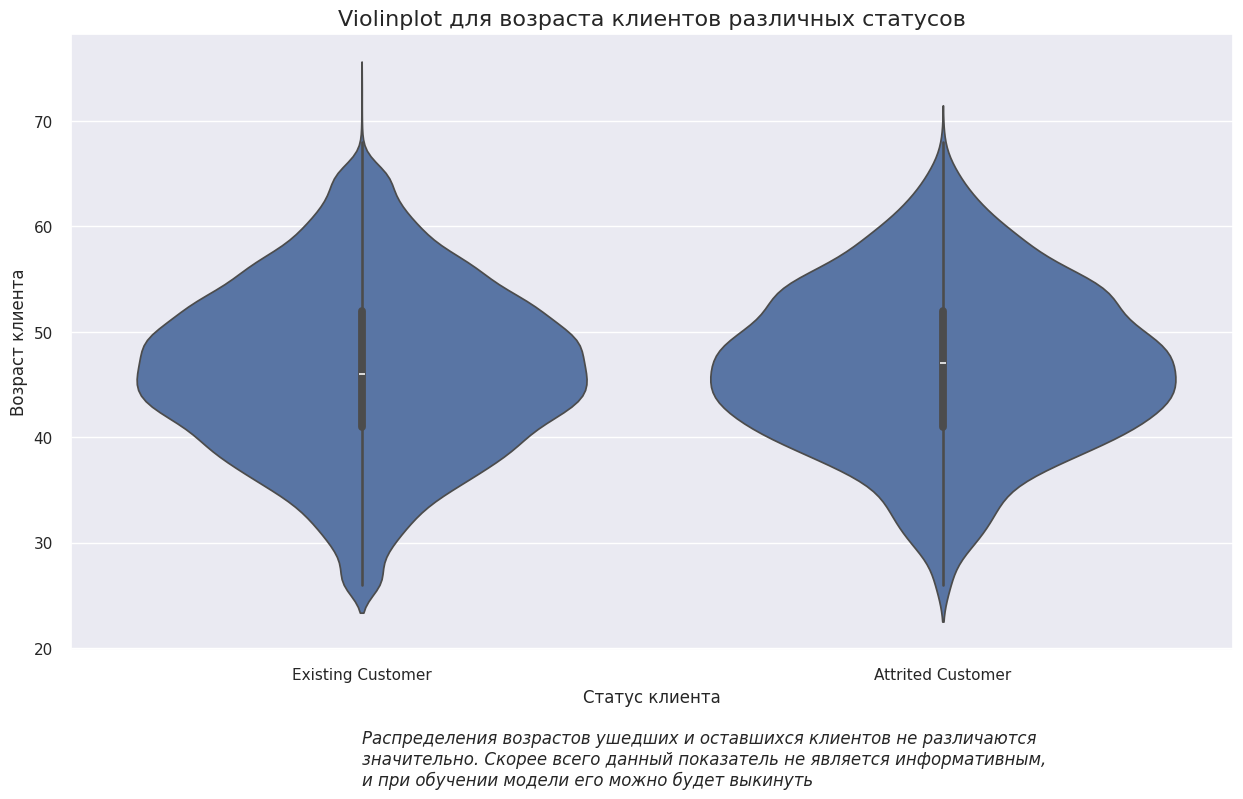

In [ ]:
plt.title("Violinplot для возраста клиентов различных статусов", fontsize=16)
sns.violinplot(data=df, x="Attrition_Flag", y='Customer_Age')
plt.xlabel("Статус клиента")
plt.ylabel("Возраст клиента")

violin_text = """Распределения возрастов ушедших и оставшихся клиентов не различаются
значительно. Скорее всего данный показатель не является информативным,
и при обучении модели его можно будет выкинуть"""
plt.text(0, 7, violin_text, fontstyle='italic', fontsize=12)

pdf.savefig(bbox_inches='tight')

**3. Проверка на линейную зависимость числовых признаков**

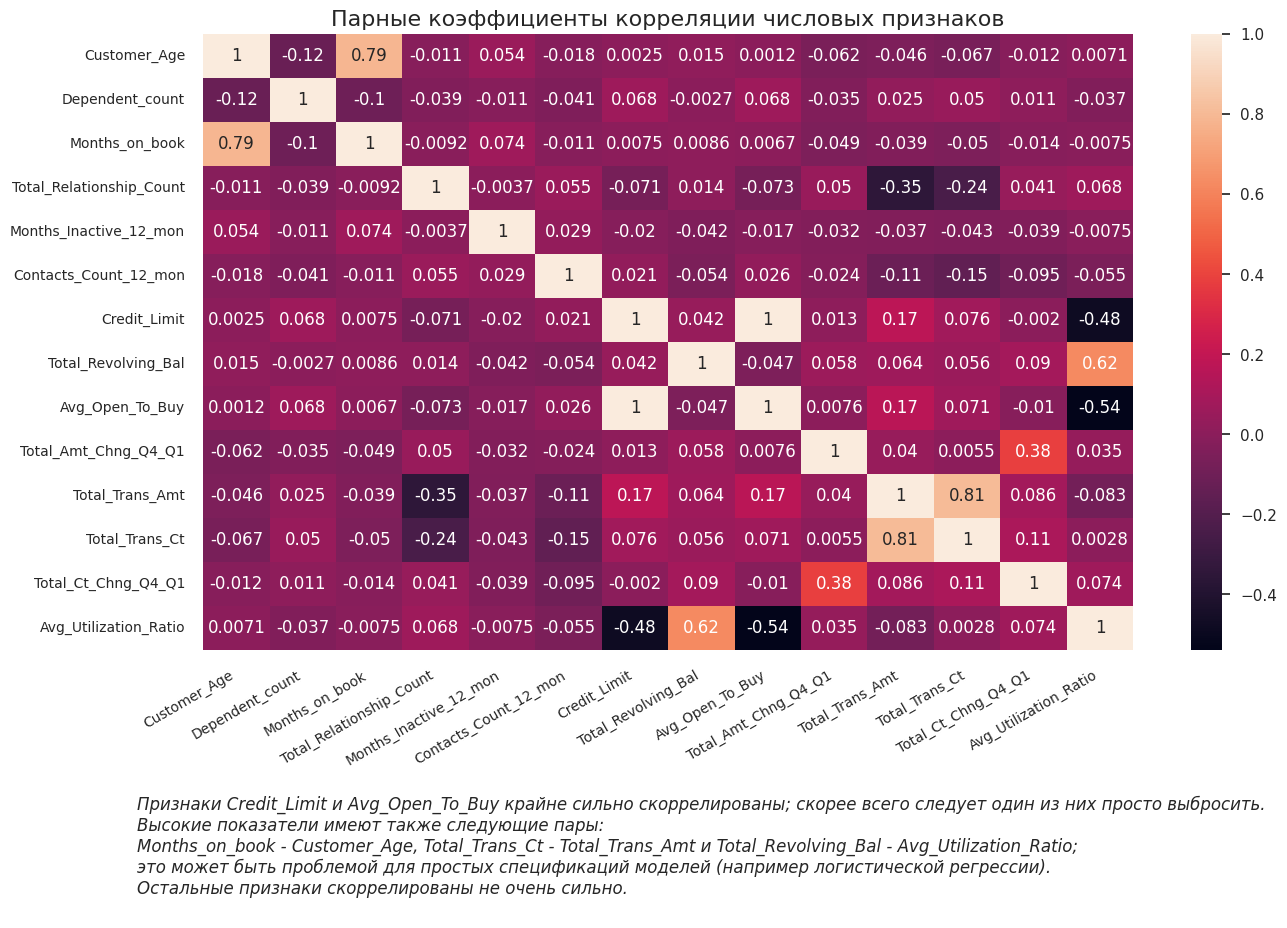

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.select_dtypes([np.number]).drop(columns=['CLIENTNUM']).corr(), annot=True)
plt.title("Парные коэффициенты корреляции числовых признаков", fontsize=16)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=30, ha='right')

heat_text = """Признаки Credit_Limit и Avg_Open_To_Buy крайне сильно скоррелированы; скорее всего следует один из них просто выбросить.
Высокие показатели имеют также следующие пары:
Months_on_book - Customer_Age, Total_Trans_Ct - Total_Trans_Amt и Total_Revolving_Bal - Avg_Utilization_Ratio;
это может быть проблемой для простых спецификаций моделей (например логистической регрессии).
Остальные признаки скоррелированы не очень сильно.
"""
plt.text(-1, 20, heat_text, fontstyle='italic')

pdf.savefig(bbox_inches='tight')

**4. Анализ совместных распределений категориальных признаков и таргета**

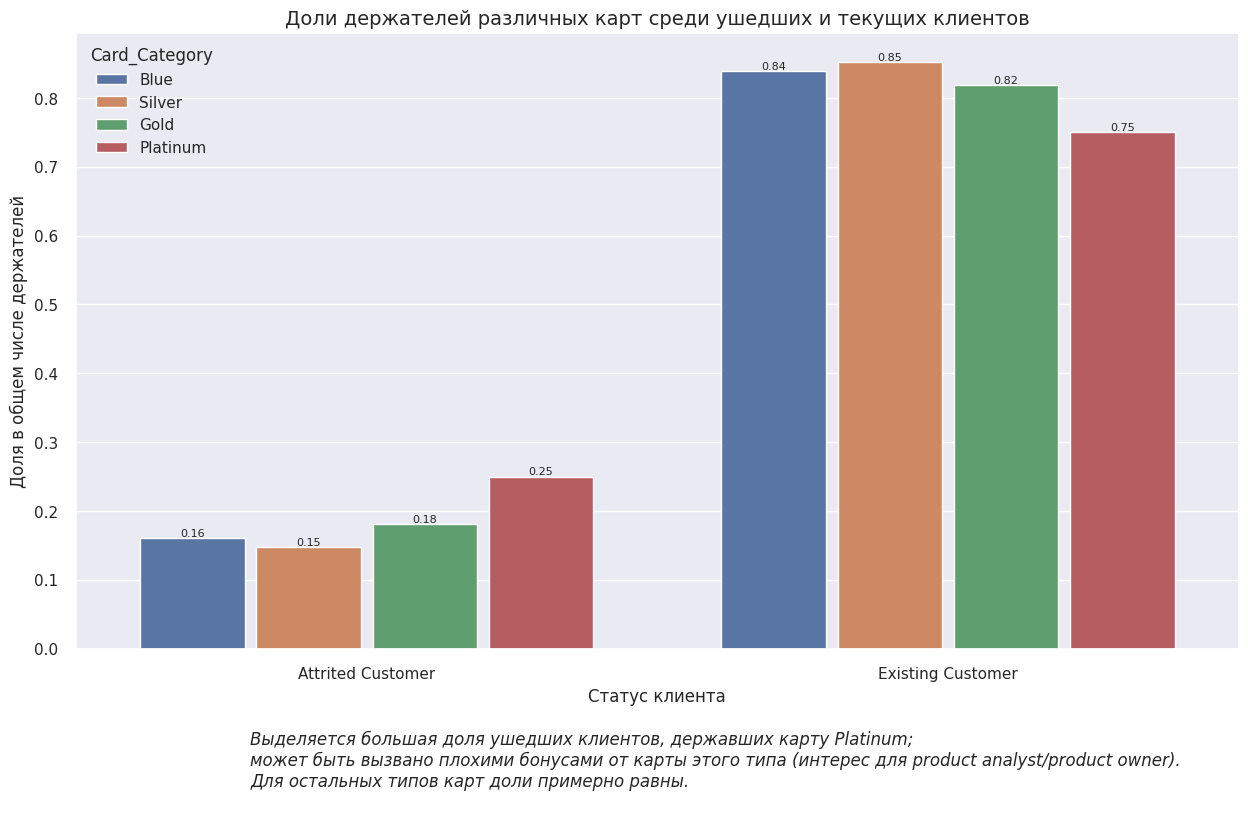

In [ ]:
data = pd.DataFrame(df.groupby(by=['Attrition_Flag'])['Card_Category'].value_counts())
data.rename(columns={'Card_Category':'Count'},inplace=True)
data['Count'] = data['Count'] / np.tile(df['Card_Category'].value_counts().values, 2)

plt.title('Доли держателей различных карт среди ушедших и текущих клиентов', fontsize=14)
ax = sns.barplot(data.reset_index(), x="Attrition_Flag", y="Count", hue="Card_Category", gap=0.1)

for i in range(4):
  ax.bar_label(ax.containers[i], fontsize=8, fmt='%0.2f')

plt.xlabel('Статус клиента')
plt.ylabel('Доля в общем числе держателей')

bar_text = """Выделяется большая доля ушедших клиентов, державших карту Platinum;
может быть вызвано плохими бонусами от карты этого типа (интерес для product analyst/product owner).
Для остальных типов карт доли примерно равны.
"""
plt.text(-0.2, -0.23, bar_text, fontstyle='italic', fontsize=12)

pdf.savefig(bbox_inches='tight')

**5. Выявление признака с существенными различиями для разных таргетов**

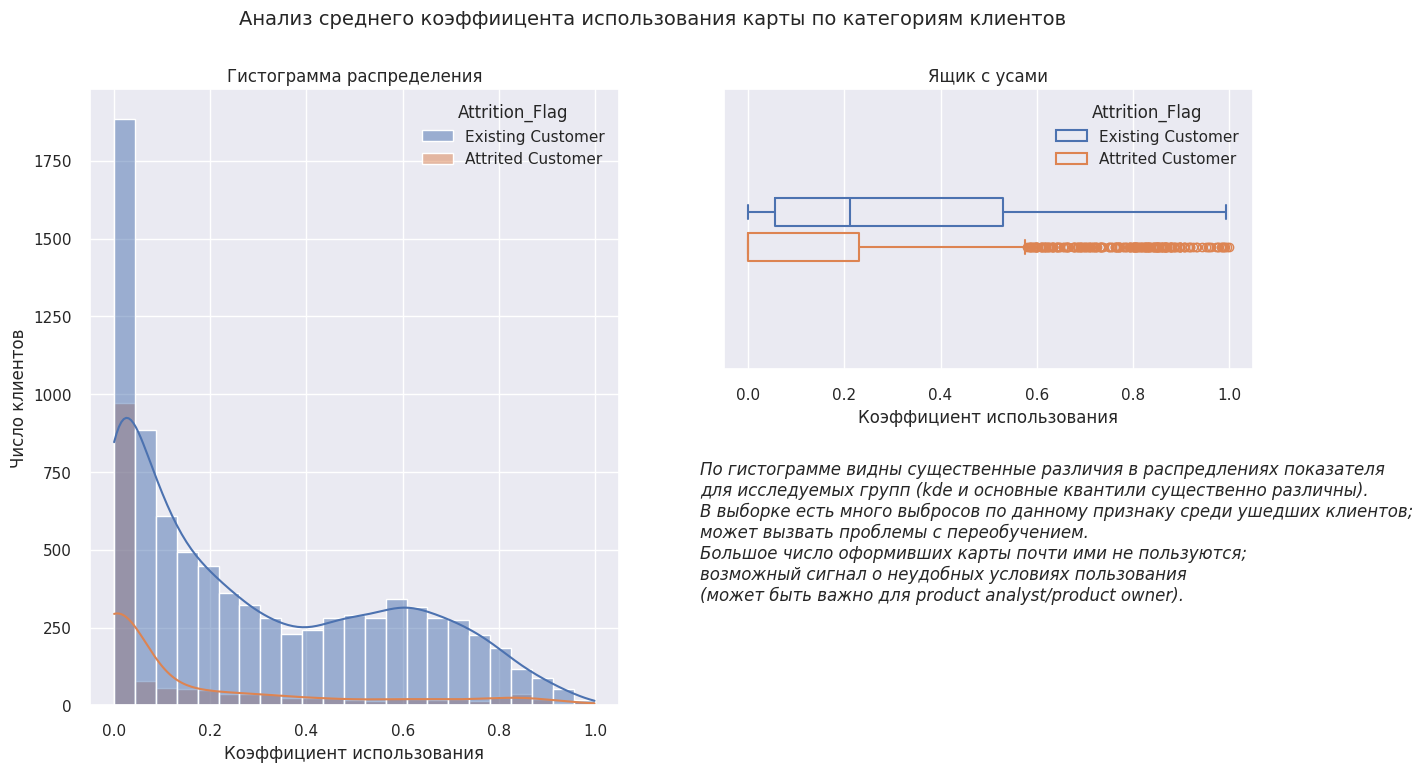

In [ ]:
plt.suptitle("Анализ среднего коэффиицента использования карты по категориям клиентов", fontsize=14)

plt.subplot(1, 2, 1)
plt.title("Гистограмма распределения", fontsize=12)
plt.xlabel("Коэффициент использования")
plt.ylabel("Число клиентов")
sns.histplot(data = df, x='Avg_Utilization_Ratio', hue='Attrition_Flag', kde=True)

plt.subplot(2, 2, 2)
plt.title("Ящик с усами", fontsize=12)
sns.boxplot(data = df, x='Avg_Utilization_Ratio', hue='Attrition_Flag', width=0.25, orient='h', gap=0.2, fill=False)
plt.xlabel("Коэффициент использования")

histbox_text = """По гистограмме видны существенные различия в распредлениях показателя
для исследуемых групп (kde и основные квантили существенно различны).
В выборке есть много выбросов по данному признаку среди ушедших клиентов;
может вызвать проблемы с переобучением.
Большое число оформивших карты почти ими не пользуются;
возможный сигнал о неудобных условиях пользования
(может быть важно для product analyst/product owner).
"""
plt.text(-0.1, 1.4, histbox_text, fontstyle='italic')

pdf.savefig(bbox_inches='tight')

**6. Выявление продуктовой связи в синергии категориальных признаков**

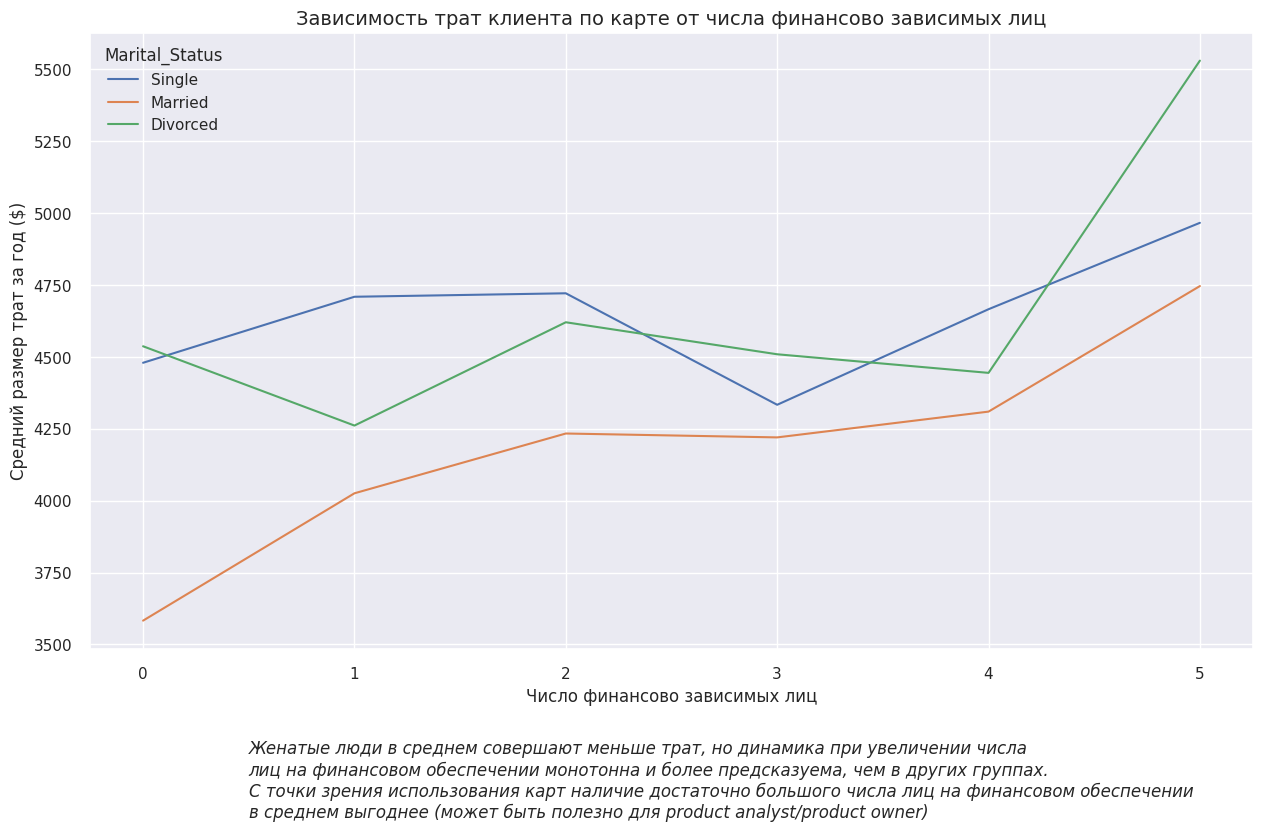

In [ ]:
data = df.groupby(by=['Marital_Status','Dependent_count']).agg({"Total_Trans_Amt":"mean"}).sort_values(by=['Marital_Status', 'Dependent_count'],ascending=[False,True]).reset_index()
data = data.loc[(data.Marital_Status != 'Unknown'), :]

plt.figure(figsize=(15,8))

plt.title("Зависимость трат клиента по карте от числа финансово зависимых лиц", fontsize=14)
plt.xlabel("Число финансово зависимых лиц")
plt.ylabel("Средний размер трат за год ($)")
sns.lineplot(data=data, x='Dependent_count', y='Total_Trans_Amt', hue='Marital_Status')

line_text = """Женатые люди в среднем совершают меньше трат, но динамика при увеличении числа
лиц на финансовом обеспечении монотонна и более предсказуема, чем в других группах.
С точки зрения использования карт наличие достаточно большого числа лиц на финансовом обеспечении
в среднем выгоднее (может быть полезно для product analyst/product owner) """
plt.text(x=0.5, y=2900, s=line_text, fontstyle='italic',fontsize=12)

pdf.savefig(bbox_inches='tight')

In [ ]:
pdf.close()